In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from scipy.ndimage import rotate

15477


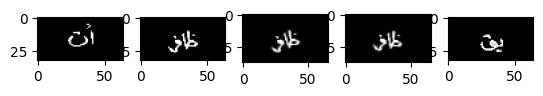

In [2]:
#load images from Total Images folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

images = load_images_from_folder(r'Total Images Processed')


#code validation
#show first 5 images using plt subplot
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])

print(len(images))

In [3]:
images[0].shape

(32, 64, 3)

In [4]:
images[2].shape

(37, 66, 3)

In [5]:
# resize images to 32x64
resized_images = []
for img in images:
    img = cv2.resize(img, (64, 32))
    resized_images.append(img)

In [6]:
resized_images[2].shape

(32, 64, 3)

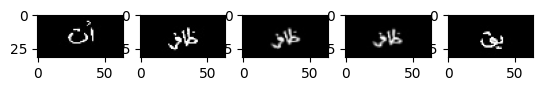

In [7]:
#show first 5 images using plt subplot
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(resized_images[i])


In [8]:
#load labels from Total GT folder
def load_labels_from_folder(folder):
    labels = []
    for filename in os.listdir(folder):
        #read inside txt files
        with open(os.path.join(folder,filename), 'r', encoding='utf-8') as f:
            label = f.read()
        labels.append(label)
    return labels

labels = load_labels_from_folder(r'Total GT Processed')
print(len(labels))
#print first 5 labels
print (labels[0:5])

15477
['أت', 'ظافر', 'ظافر', 'ظافر', 'يق']


## DEALING WITH LABELS

In [9]:
def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels

In [10]:
labels_cleaned = clean_labels(labels)

In [11]:
# select only the images with labels cleaned
resized_images = [img for img, label in zip(resized_images, labels_cleaned) if label]
labels = [label for label in labels_cleaned if label]

In [12]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
max_len = 0
characters = set()
for label in labels:
    label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

Maximum length:  7
Vocab size:  39


In [13]:
print(characters)

{'ا', 'آ', 'ش', 'س', 'ظ', 'د', 'إ', 'أ', 'ث', 'ل', 'غ', 'ي', 'ت', 'ك', ':', 'ض', 'ن', 'ح', 'ذ', 'ة', 'و', 'ز', 'ر', 'ع', 'ه', 'ب', 'ئ', '.', 'ؤ', 'ف', 'م', 'خ', 'ٍ', 'ص', 'ج', 'ء', 'ق', '،', 'ط'}


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [15]:
padding_token = 99

def vectorize_label(label):
    print(label)
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label



In [16]:
label1=vectorize_label(labels[0])
print(label1)
indices = tf.gather(label1, tf.where(tf.math.not_equal(label1, padding_token)))
label1 = tf.strings.reduce_join(num_to_char(indices))
label1 = label1.numpy().decode("utf-8")
print(label1)

أت
tf.Tensor([ 8 13 99 99 99 99 99], shape=(7,), dtype=int64)
أت


In [17]:
def devectorize_label(label):
    # Remove padding tokens
    label = label[label != padding_token]
    
    # Convert label indices back to characters
    characters = [char_to_num.get_vocabulary()[idx] for idx in label]
    
    # Concatenate characters to form the original text
    original_text = ''.join(characters)
    
    return original_text

In [18]:
len(resized_images)

15372

In [19]:
len(labels)

15372

In [20]:
labels_cleaned

['أت',
 'ظافر',
 'ظافر',
 'ظافر',
 'يق',
 'يق',
 'يق',
 'را',
 'را',
 'را',
 'ي',
 'ي',
 'ي',
 'لؤ',
 'لؤ',
 'لؤ',
 'بن',
 'بن',
 'بن',
 'رؤوف',
 'رؤوف',
 'رؤوف',
 'بصحبة',
 'بصحبة',
 'بصحبة',
 'م',
 'م',
 'م',
 'ضرغا',
 'ضرغا',
 'ضرغا',
 'أت',
 'أت',
 'بد',
 'مظفر',
 'مظفر',
 'مظفر',
 'نوح',
 'نوح',
 'نوح',
 'ذهب',
 'ذهب',
 'ذهب',
 'بد',
 'بد',
 '.',
 '.',
 '.',
 'للحج',
 'للحج',
 'للحج',
 'عفيف',
 'عفيف',
 'عفيف',
 'ن',
 'ن',
 'ن',
 'خاز',
 'خاز',
 'خاز',
 'وهلال',
 'وهلال',
 'وهلال',
 'عطعوط',
 'عطعوط',
 'عطعوط',
 'وهو',
 'و',
 'و',
 'و',
 'طفنا',
 'طفنا',
 'طفنا',
 'لنا',
 'لنا',
 'لنا',
 'وصو',
 'وصو',
 'وصو',
 'عند',
 'عند',
 'عند',
 '.',
 '.',
 '.',
 'يلبي',
 'يلبي',
 'يلبي',
 'آخر',
 'آخر',
 'آخر',
 'ثر',
 'ثر',
 'ثر',
 'إ',
 'إ',
 'إ',
 'وهو',
 'وهو',
 'حاج',
 'حاج',
 'حاج',
 'في',
 'في',
 'في',
 'جاري',
 'جاري',
 'جاري',
 'كان',
 'كان',
 'كان',
 '.',
 '.',
 '.',
 'شيخ',
 'شيخ',
 'شيخ',
 'مع',
 'مع',
 'مع',
 'سعينا',
 'سعينا',
 'سعينا',
 '.',
 'رايق',
 'رايق',
 'رايق',
 'ي',
 

In [21]:
labels_v = [vectorize_label(i) for i in labels]
# #load labels vectorized
# labels_v = np.load('labels_v.npy')

أت
ظافر
ظافر
ظافر
يق
يق
يق
را
را
را
ي
ي
ي
لؤ
لؤ
لؤ
بن
بن
بن
رؤوف
رؤوف
رؤوف
بصحبة
بصحبة
بصحبة
م
م
م
ضرغا
ضرغا
ضرغا
أت
أت
بد
مظفر
مظفر
مظفر
نوح
نوح
نوح
ذهب
ذهب
ذهب
بد
بد
.
.
.
للحج
للحج
للحج
عفيف
عفيف
عفيف
ن
ن
ن
خاز
خاز
خاز
وهلال
وهلال
وهلال
عطعوط
عطعوط
عطعوط
وهو
و
و
و
طفنا
طفنا
طفنا
لنا
لنا
لنا
وصو
وصو
وصو
عند
عند
عند
.
.
.
يلبي
يلبي
يلبي
آخر
آخر
آخر
ثر
ثر
ثر
إ
إ
إ
وهو
وهو
حاج
حاج
حاج
في
في
في
جاري
جاري
جاري
كان
كان
كان
.
.
.
شيخ
شيخ
شيخ
مع
مع
مع
سعينا
سعينا
سعينا
.
رايق
رايق
رايق
ي
ي
ي
لؤ
لؤ
لؤ
بن
بن
بن
.
.
.
رؤوف
رؤوف
رؤوف
بصحبة
بصحبة
بصحبة
م
م
م
ضرغا
ضرغا
ضرغا
مظفر
مظفر
مظفر
.
.
للحج
نوح
نوح
نوح
هب
هب
هب
ذ
ذ
ذ
للحج
للحج
عفيف
عفيف
عفيف
خازن
خازن
خازن
ل
ل
ل
وهلا
وهلا
وهلا
عطعوط
عطعوط
عطعوط
فر
فر
فر
ظا
ظا
ظا
الخيمة
وصولنا
وصولنا
وصولنا
عند
عند
عند
.
.
.
يلبي
يلبي
يلبي
آخر
آخر
آخر
إ
إ
إ
حاج
حاج
حاج
لحجيج
لحجيج
لحجيج
ا
ا
ا
قوافل
قوافل
قوافل
الخيمة
الخيمة
في
أت
أت
أت
بد
بد
بد
في
في
جاري
جاري
جاري
كان
كان
كان
.
.
.
شيخ
شيخ
شيخ
مع
مع
مع
وسعينا
وسعينا
وسعينا
طفنا
طفنا
طفنا
.
دراق
دراق
دراق
،


## END

ذ


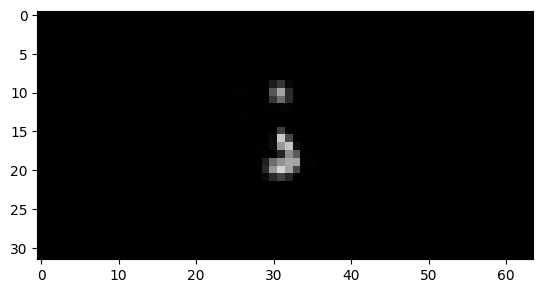

In [22]:
#show a random image and its label
ran = random.randint(0,len(images))
plt.imshow(resized_images[ran])
#print 3rd label
print(labels[ran])

In [23]:
labels_de_v = [devectorize_label(label) for label in labels_v]
# load labels devectorized
# labels_de_v = np.load('labels_de_v.npy')

In [24]:
len(labels_de_v)

15372

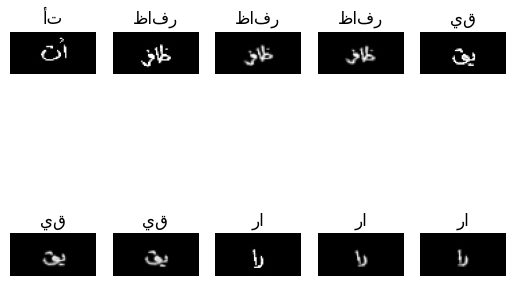

In [25]:
#show first 10 images using plt with their repective decoded labels
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(resized_images[i], cmap='gray')
    plt.title(labels_de_v[i])
    plt.axis('off')
plt.show()

In [26]:
len(labels_de_v)

15372

In [27]:
len(resized_images)

15372

In [28]:
# reshape data
resized_images = np.array(resized_images)
resized_images.shape

(15372, 32, 64, 3)

### CONVERT THIS PART ACCORDING TO YOUR ARCHITECTURE

In [29]:
# convert all images to grayscale
# resized_images = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in resized_images])

In [30]:
# # reshape data
# resized_images = resized_images.reshape((15372, 32, 64, 1))
# resized_images.shape

In [31]:
# rescale data
resized_images = resized_images / 255.0

In [32]:
# # import image data generator
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# generator = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2,
#     shear_range=0.2,
#     rotation_range=10,
# )
# generator.fit(resized_images)
# train_generator = generator.flow(
#     resized_images,
#     labels_v,
#     batch_size=128,
#     subset='training',
#     shuffle=True
# )
# validation_generator = generator.flow(
#     resized_images,
#     labels_v,
#     batch_size=128,
#     subset='validation',
#     shuffle=True


In [33]:
# print(len(train_generator) * 128)
# print(len(validation_generator) * 128)

In [34]:
# batch_images, batch_labels = train_generator.next()
# print("Batch images shape:", batch_images.shape)
# print("Batch labels shape:", batch_labels.shape)

In [35]:
#create a train test split of 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels_v, test_size=0.2, random_state=42)
#Create a validation set
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=30)

In [36]:
# #reshape data to None, 64, 32, 3
# X_train = X_train.reshape(X_train.shape[0], 64, 32, 1)
# # X_val = X_val.reshape(X_val.shape[0], 64, 32, 1)
# X_test = X_test.reshape(X_test.shape[0], 64, 32, 1)
# #find shape of the images after processing
# print(X_train.shape)

In [37]:
y_train = np.array(y_train)
# y_val = np.array(y_val)
y_test = np.array(y_test)

In [38]:
# y_train

## LOSS

In [39]:
# import keras
import keras
class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred

## VGG19

In [40]:
from tensorflow.keras.applications import ResNet152

base = ResNet152(weights=None, include_top=False, input_shape=(32, 64, 3))
base.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

In [41]:
# Freezing the layers
# for layer in base.layers[:-5]:
#     layer.trainable = False

## Model

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Reshape, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


# Define your model architecture
def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(32, 64, 3), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # vgg model
    x = base(input_img)
    x = keras.layers.Reshape((32,128))(x)
    x = keras.layers.Dense(128, activation="relu", name="dense2")(x)
    x= keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(512, return_sequences=True, dropout=0.3))(x)
    x = keras.layers.Dense(len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense3")(x)
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="Handwriting_OCR")
    # Optimizer.
    opt = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model

In [43]:
model = build_model()

model.summary()

Model: "Handwriting_OCR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 32, 64, 3)]  0           []                               
                                                                                                  
 resnet152 (Functional)         (None, 1, 2, 2048)   58370944    ['image[0][0]']                  
                                                                                                  
 reshape (Reshape)              (None, 32, 128)      0           ['resnet152[0][0]']              
                                                                                                  
 dense2 (Dense)                 (None, 32, 128)      16512       ['reshape[0][0]']                
                                                                                    

In [44]:
# learning rate scheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001)
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("Paper-ResNet152.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min', period = 10)

In [45]:
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060, compute capability 8.6


In [46]:
# Train the model
history = model.fit([X_train, y_train], epochs=150, validation_data=([X_test, y_test],None),batch_size=128, callbacks=[lr_scheduler, checkpoint])

Epoch 1/150
97/97 [==============================] - 63s 289ms/step - loss: 12.1820 - val_loss: 9.7778 - lr: 0.0010
Epoch 2/150
97/97 [==============================] - 26s 264ms/step - loss: 8.2666 - val_loss: 9.5481 - lr: 0.0010
Epoch 3/150
97/97 [==============================] - 26s 267ms/step - loss: 7.7773 - val_loss: 9.5882 - lr: 0.0010
Epoch 4/150
97/97 [==============================] - 26s 267ms/step - loss: 7.5369 - val_loss: 9.5698 - lr: 0.0010
Epoch 5/150
97/97 [==============================] - 26s 268ms/step - loss: 7.2143 - val_loss: 8.3725 - lr: 0.0010
Epoch 6/150
97/97 [==============================] - 26s 266ms/step - loss: 6.9292 - val_loss: 8.3262 - lr: 0.0010
Epoch 7/150
97/97 [==============================] - 26s 266ms/step - loss: 6.5312 - val_loss: 7.3561 - lr: 0.0010
Epoch 8/150
97/97 [==============================] - 26s 267ms/step - loss: 6.1734 - val_loss: 6.9947 - lr: 0.0010
Epoch 9/150
97/97 [==============================] - 26s 266ms/step - loss: 5.7

In [63]:
#Save the model
model.save('Paper_Resnet512-WP-f.h5')

## Evaluation

In [48]:
# Evaluate the model
model.evaluate([X_test, y_test])

97/97 [==============================] - 3s 32ms/step - loss: 0.3399


0.3398532271385193

In [49]:

# predict 
y_pred = model.predict([X_test, y_test])

97/97 [==============================] - 5s 27ms/step


In [50]:
y_pred

array([[[6.12520146e-10, 4.85949045e-07, 9.15105858e-08, ...,
         8.14260925e-09, 1.53073909e-09, 9.99958754e-01],
        [1.74437201e-11, 1.26944562e-08, 4.88159790e-10, ...,
         6.98183789e-10, 3.29310745e-11, 9.99999881e-01],
        [2.27951078e-12, 4.44799420e-10, 1.14675192e-09, ...,
         6.42572995e-10, 2.95911971e-12, 1.00000000e+00],
        ...,
        [3.86269662e-11, 1.17252307e-06, 3.13785049e-13, ...,
         1.19607946e-09, 7.95950666e-11, 2.47098183e-06],
        [8.84917348e-11, 2.73270302e-06, 6.43515449e-11, ...,
         1.44949386e-09, 3.67611025e-10, 3.12021058e-08],
        [1.82884805e-12, 6.60545663e-09, 1.14041996e-11, ...,
         2.63987894e-11, 4.82866741e-12, 5.15710887e-08]],

       [[1.80683333e-11, 2.72528666e-10, 5.91190763e-10, ...,
         4.67101691e-10, 3.12528822e-11, 1.00000000e+00],
        [1.62101617e-11, 6.62560840e-10, 1.39246059e-10, ...,
         2.45942988e-10, 1.44651582e-11, 9.99999881e-01],
        [3.48645418e-11, 

In [51]:
y_test

array([[ 1, 10, 18, ..., 99, 99, 99],
       [10,  1, 99, ..., 99, 99, 99],
       [28, 99, 99, ..., 99, 99, 99],
       ...,
       [23, 21, 29, ..., 99, 99, 99],
       [10, 13,  1, ..., 99, 99, 99],
       [10, 25, 99, ..., 99, 99, 99]], dtype=int64)

### CER Error defining

In [52]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    print(output_text)
    return output_text


In [53]:
y_pred_text = decode_batch_predictions(y_pred)

['الحج', 'لا', '.', 'قوا', 'ش', 'ث', 'يلبي', 'فا', 'ش', 'ئم', 'را', 'ز', 'ت', 'ر', 'ا', 'نقض', '،', 'تعلم', 'هل', 'جاري', '.', 'عطعو', 'ئم', 'مثل', '.', 'نقض', 'عند', 'هلا', 'ي', 'س', 'ا', 'بن', 'ع', 'آخر', 'للحج', 'وصولنا', '.', 'خر', 'يلبي', 'فر', 'ا', 'وهو', '،', '.', 'آخر', 'رايق', 'ي', 'يق', 'بفلس', 'فل', 'ذ', 'فا', '.', 'ح', 'ب', 'هلا', 'للحج', 'خ', 'نقض', 'ضر', 'طفنا', 'ثر', 'ذ', 'يتكلم', 'ثر', 'أت', 'وهو', 'ضرغا', 'لنا', 'فهمها', 'في', '.', 'ت', 'ري', 'ا', 'ا', '.', 'رؤوف', '.', 'ظافر', 'بد', 'ثر', 'ر', 'و', 'في', '،', 'ر', 'خار', 'لضا', '،', 'نا', ':', 'ظ', 'بنا', 'لهذ', 'الكلما', 'مشمش', 'م', 'الكلما', 'حا', 'ا', 'ري', '،', 'ذ', 'ع', 'ا', 'ع', 'ط', 'هلا', 'قو', 'في', 'ا', 'للحج', 'ا', 'أ', 'شيخ', 'لؤ', 'بفلس', '.', 'بكلما', '.', 'اليخ', 'رؤوف', 'وصولنا', 'نا', 'راجح', 'بصحبة', 'بلغ', 'ا', 'را', 'ا', 'لؤي', 'بنا', 'ا', 'لخيمة', 'عفيف', 'رايق', 'و', 'ج', 'فل', 'ه', 'في', 'ا', 'زن', '،', 'طفنا', 'ر', 'آ', 'ا', 'خ', 'ا', 'لتا', 'يق', 'ع', 'عطعو', 'لزمتك', 'في', '.', 'في', 'النص',

In [54]:
# devectorize the labels
y_test_texts = [devectorize_label(label) for label in y_test]

In [55]:
y_pred_text

['الحج',
 'لا',
 '.',
 'قوا',
 'ش',
 'ث',
 'يلبي',
 'فا',
 'ش',
 'ئم',
 'را',
 'ز',
 'ت',
 'ر',
 'ا',
 'نقض',
 '،',
 'تعلم',
 'هل',
 'جاري',
 '.',
 'عطعو',
 'ئم',
 'مثل',
 '.',
 'نقض',
 'عند',
 'هلا',
 'ي',
 'س',
 'ا',
 'بن',
 'ع',
 'آخر',
 'للحج',
 'وصولنا',
 '.',
 'خر',
 'يلبي',
 'فر',
 'ا',
 'وهو',
 '،',
 '.',
 'آخر',
 'رايق',
 'ي',
 'يق',
 'بفلس',
 'فل',
 'ذ',
 'فا',
 '.',
 'ح',
 'ب',
 'هلا',
 'للحج',
 'خ',
 'نقض',
 'ضر',
 'طفنا',
 'ثر',
 'ذ',
 'يتكلم',
 'ثر',
 'أت',
 'وهو',
 'ضرغا',
 'لنا',
 'فهمها',
 'في',
 '.',
 'ت',
 'ري',
 'ا',
 'ا',
 '.',
 'رؤوف',
 '.',
 'ظافر',
 'بد',
 'ثر',
 'ر',
 'و',
 'في',
 '،',
 'ر',
 'خار',
 'لضا',
 '،',
 'نا',
 ':',
 'ظ',
 'بنا',
 'لهذ',
 'الكلما',
 'مشمش',
 'م',
 'الكلما',
 'حا',
 'ا',
 'ري',
 '،',
 'ذ',
 'ع',
 'ا',
 'ع',
 'ط',
 'هلا',
 'قو',
 'في',
 'ا',
 'للحج',
 'ا',
 'أ',
 'شيخ',
 'لؤ',
 'بفلس',
 '.',
 'بكلما',
 '.',
 'اليخ',
 'رؤوف',
 'وصولنا',
 'نا',
 'راجح',
 'بصحبة',
 'بلغ',
 'ا',
 'را',
 'ا',
 'لؤي',
 'بنا',
 'ا',
 'لخيمة',
 'عفيف',
 'رايق',

In [56]:
y_test_texts

['الحج',
 'لا',
 '.',
 'قوا',
 'ش',
 'ث',
 'يلبي',
 'فا',
 'ش',
 'ئم',
 'را',
 'ز',
 'ت',
 'ر',
 'ا',
 'نقض',
 '،',
 'تعلم',
 'هل',
 'جاري',
 '.',
 'عطعو',
 'ئم',
 'مثل',
 '.',
 'نقض',
 'عند',
 'هل',
 'ي',
 'س',
 'ا',
 'بن',
 'ع',
 'آخر',
 'للحج',
 'وصولنا',
 '.',
 'خر',
 'يلبي',
 'فر',
 'ا',
 'وهو',
 '،',
 '.',
 'آخر',
 'رايق',
 'ي',
 'يق',
 'بفلس',
 'فل',
 'ذ',
 'فا',
 '.',
 'ح',
 'ب',
 'هلا',
 'للحج',
 'خ',
 'نقض',
 'ضر',
 'طفنا',
 'ثر',
 'ذ',
 'يتكلم',
 'ثر',
 'أت',
 'وهو',
 'ضرغا',
 'لنا',
 'فهمها',
 'في',
 '.',
 'ت',
 'ري',
 'ا',
 'ا',
 '.',
 'رؤوف',
 '.',
 'ظافر',
 'ب',
 'ثر',
 'ر',
 'و',
 'في',
 '،',
 'ر',
 'خار',
 'لضا',
 '،',
 'نا',
 ':',
 'ظ',
 'بنا',
 'لهذ',
 'الكلما',
 'مشمش',
 'م',
 'الكلما',
 'حا',
 'ا',
 'ري',
 '،',
 'ذ',
 'ع',
 'ر',
 'ع',
 'ط',
 'هلا',
 'قو',
 'في',
 'ا',
 'للحج',
 'ا',
 'بدأ',
 'شيخ',
 'لؤ',
 'بفلس',
 '.',
 'بكلما',
 'را',
 'الشيخ',
 'رؤوف',
 'وصولنا',
 'نا',
 'راجح',
 'بصحبة',
 'بلغ',
 'ا',
 'را',
 'ا',
 'لؤي',
 'بنا',
 'ا',
 'لخيمة',
 'عفيف',
 'رايق

In [57]:
# save y_pred_text as a whole txt file
with open('y_pred_text.txt', 'w', encoding='utf-8') as f:
    for item in y_pred_text:
        f.write("%s\n" % item)

In [58]:
# save y_test_texts as a whole txt file
with open('y_test_texts.txt', 'w', encoding='utf-8') as f:
    for item in y_test_texts:
        f.write("%s\n" % item)

In [59]:
import Levenshtein

In [60]:
def calculate_cer(y_true, y_pred):
    total_distance = 0
    total_true_char = 0
    for true_seq, pred_seq in zip(y_true, y_pred):
        true_seq = true_seq.rstrip('\n')
        pred_seq = pred_seq.rstrip('\n')
        total_distance += Levenshtein.distance(true_seq, pred_seq)
        total_true_char += len(true_seq)
    calc=[total_distance, total_true_char]
    cer = (total_distance / total_true_char)
    return cer, calc

In [61]:
cer, calc = calculate_cer(y_test_texts, y_pred_text)
print(calc[0],"/",calc[1],"=","{:.2f}%".format(cer*100))

212 / 7157 = 2.96%


In [62]:
print("I'm Here")

I'm Here
